# *Outlier Detection Using Statistical Methods*, 

This chapter covers statistical methods for outlier and anomaly detection. These practical yet straightforward techniques are easy to interpret and implement. The chapter uses data from the **Numenta Anomaly Benchmark (NAB)** to evaluate different anomaly detection algorithms.

The recipes that you will encounter in this chapter are as follows:  
* Resampling time series data
* Detecting outliers using visualizations
* Detecting outliers using the Tukey method
* Detecting outliers using a z-score
* Detecting outliers using a modified z-score

# -- START --

* If you have the libraries installed check the versions 
* If the libraries are missing or you have an older version then either install or update the library

# Technical Requirements 
* Preparing for the recipes of this chapter

In [1]:
import matplotlib 
import pandas as pd
import scipy 
import statsmodels

print(f'''
matplotlib -> {matplotlib.__version__}
pandas -> {pd.__version__}   
scipy -> {scipy.__version__}
statsmodels -> {statsmodels.__version__}
''')


matplotlib -> 3.10.7
pandas -> 2.3.3   
scipy -> 1.16.2
statsmodels -> 0.14.5



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


In [3]:
plt.rcParams["figure.figsize"] = [12, 5]  

### Create DataFrames 

In [4]:
file = Path("data/weight-height.csv")
wh = pd.read_csv(file)


In [5]:
wh

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [6]:
wh['Gender'].value_counts()

Gender
Male      5000
Female    5000
Name: count, dtype: int64

# Recipe 2. Detecting Outliers using Visualization

In this recipe, you will explore different visualization techniques available in the seaborn library to detect outliers in your time series data. Visualizations provide an intuitive way to identify potential anomalies before applying more sophisticated statistical methods.

You will learn how to use various plots including:
- Histograms with `histplot()` and `displot()`
- Box plots with `boxplot()`
- Letter-value plots with `boxenplot()`
- Violin plots with `violinplot()`

Each visualization technique presents the data distribution differently, helping you identify patterns and potential outliers from multiple perspectives. By the end of this recipe, you'll understand the strengths and limitations of each approach for outlier detection.

## How to do it...

Let's start by importing the seaborn library and examining our data:

In [9]:
import seaborn as sns
sns.__version__

'0.13.2'

## 1. Histogram

Histograms are one of the most basic but effective tools for visualizing data distribution. They group data into bins and show the frequency of observations in each bin, helping us identify:
- The overall shape of the distribution
- Potential clusters or modes in the data
- Values that fall far from the central tendency

Let's create a histogram of our daily passenger counts:

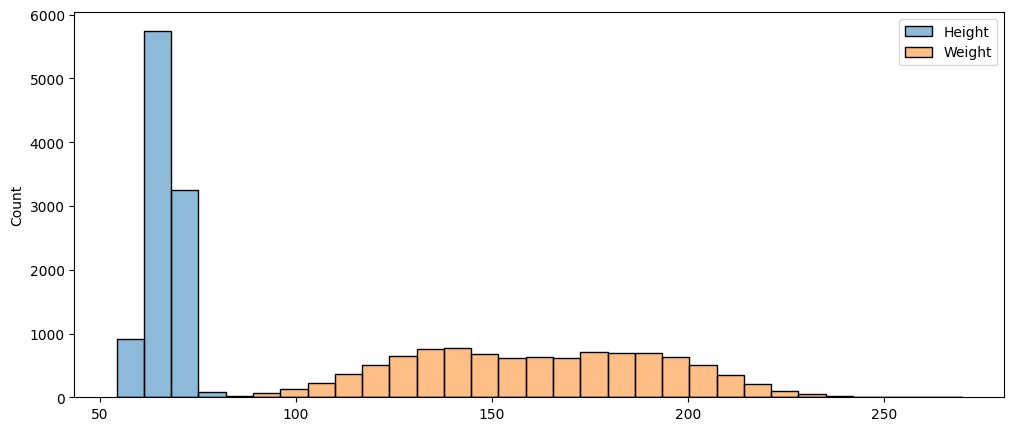

In [8]:
sns.histplot(wh);

In this histogram, we can observe the distribution of daily mean passenger counts. The values appearing at the extreme left and right of the distribution are potential outliers. 

The center of the histogram is around 15,000 daily average passengers. The observations with very low passenger counts (below 8,000) appear to be more extreme compared to the rest and may be actual outliers. The values at the high end (close to 20,000) might also be outliers, but they're less distinct from the main distribution.

Let's try another way to visualize the histogram using seaborn's `displot()` function:

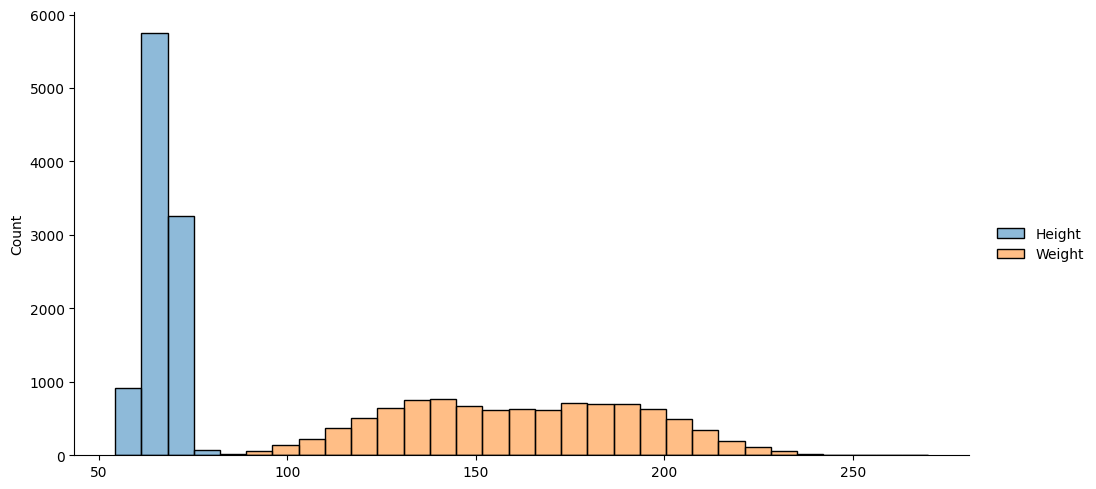

In [10]:
sns.displot(wh, kind='hist', height=5, aspect=2);

The `displot()` function provides similar information to `histplot()` but with more customization options. Here we've adjusted the height and aspect ratio for better visualization. 

While histograms are useful for understanding the overall distribution, they don't provide a clear threshold for what constitutes an outlier. For this, we'll explore box plots next.

## 2. Box Plot

Box plots are particularly valuable for outlier detection because they establish statistical boundaries (the whiskers) based on the interquartile range (IQR). Points beyond these boundaries are explicitly highlighted as potential outliers.

A box plot displays:
- The median (middle line in the box)
- The interquartile range or IQR (Q3 - Q1, represented by the box)
- The whiskers (typically extending to 1.5 * IQR beyond Q1 and Q3)
- Individual points beyond the whiskers (potential outliers)

Let's create a horizontal box plot for our data:

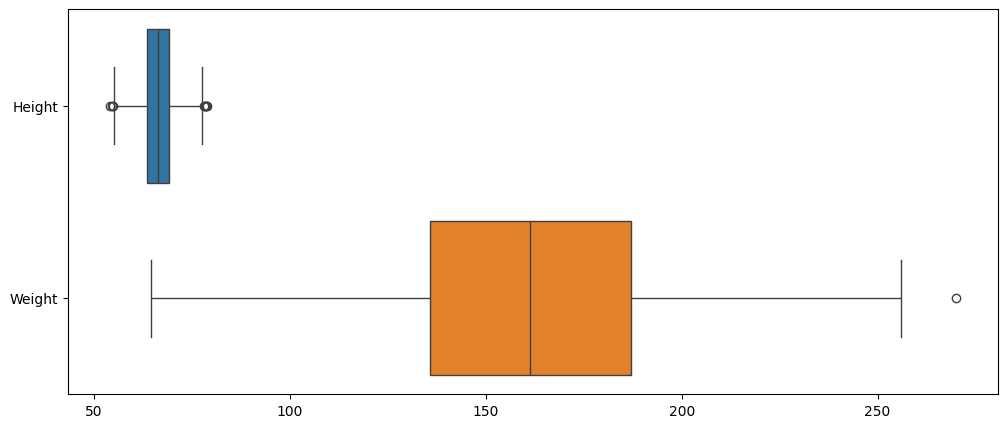

In [11]:
sns.boxplot(wh, orient='h', whis=1.5);

In this box plot, we can see potential outliers as individual points outside the whiskers. These represent values that are more than 1.5 times the IQR away from the first quartile (Q1) or third quartile (Q3).

The default `whis` parameter in seaborn's `boxplot()` function is 1.5, which corresponds to Tukey's definition of outliers. Let's explicitly set this parameter to see if the output changes:

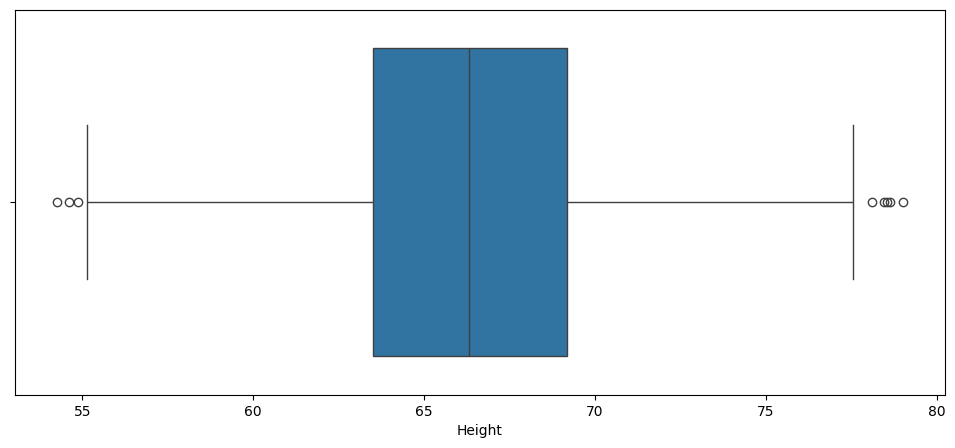

In [14]:
sns.boxplot(wh['Height'], orient='h', whis=1.5);

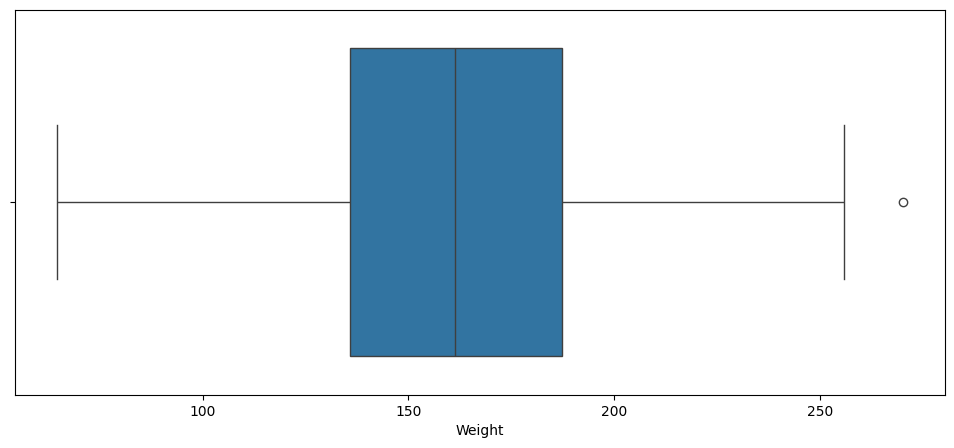

In [12]:
sns.boxplot(wh['Weight'], orient='h', whis=1.5);

In [ ]:
sns.boxplot(tx['value'], orient='h', whis=1.5);

The result is identical to the previous box plot since we used the default value of `whis=1.5`. You can adjust this parameter to change the width of the whiskers:
- Smaller values of `whis` will identify more observations as outliers
- Larger values will be more conservative in labeling points as outliers

The width of the box represents the IQR (Q3 - Q1). The lower fence is calculated as Q1 - (1.5 × IQR), and the upper fence as Q3 + (1.5 × IQR). Any observation below the lower fence or above the upper fence is considered a potential outlier.

Next, let's explore a variation of the box plot called the boxen plot (or letter-value plot).

## 3. Boxen Plot (Letter Value Plot)

The boxen plot (also known as a letter-value plot) is an enhancement to regular box plots, especially useful for larger datasets. It was introduced in the paper by Heike Hofmann, Hadley Wickham & Karen Kafadar (2017), "Letter-Value Plots: Boxplots for Large Data."

Boxen plots extend beyond the quartiles shown in traditional box plots, providing more detailed information about the distribution's tails where outliers typically reside. This makes them particularly effective for:
- Differentiating between outliers in larger datasets
- Showing more granular distribution information
- Detecting subtle anomalies that might be missed in traditional box plots

Let's create a boxen plot:

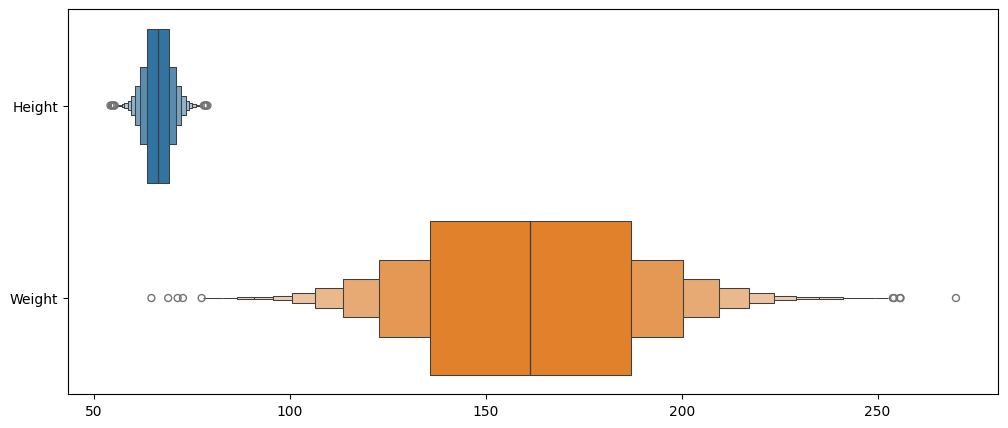

In [15]:
sns.boxenplot(wh,orient='h');

The boxen plot shows multiple nested boxes beyond the quartiles displayed in a traditional box plot. Each box represents a different letter value, providing more detailed distribution information.

To understand the exact values of the quartiles, we can examine the descriptive statistics:

<Axes: xlabel='Weight'>

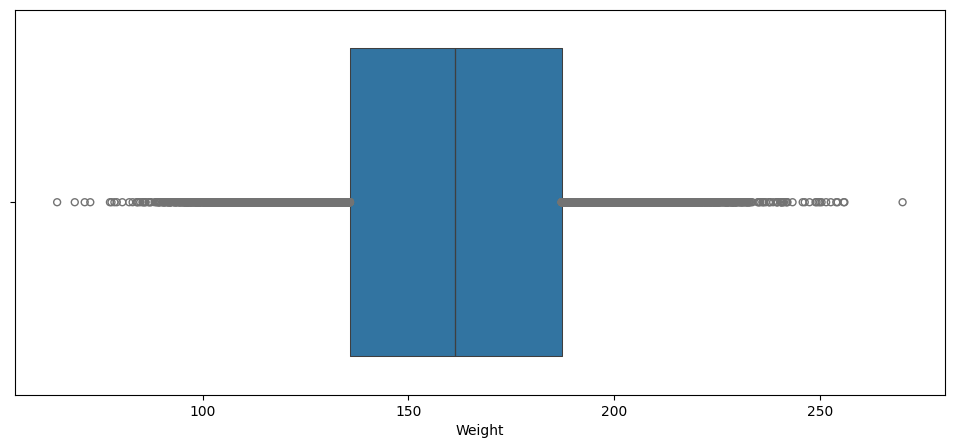

In [19]:
# changing depth with numeric value
sns.boxenplot(wh['Weight'], k_depth=1, orient='h') 

Here, we set `k_depth=1` to show just the central box (similar to a traditional box plot). Let's explore different methods for determining the depth:

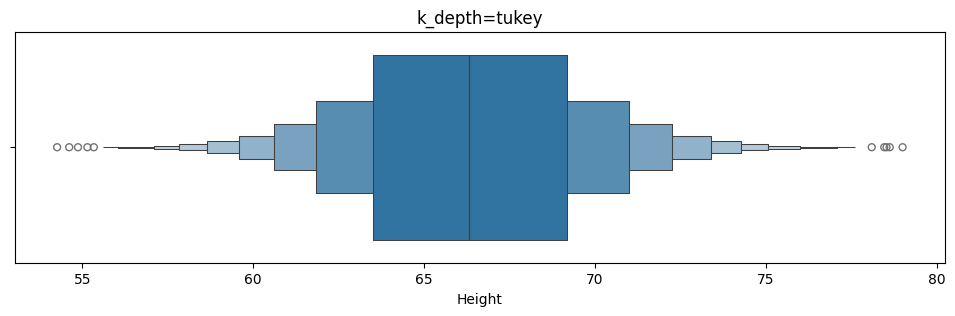

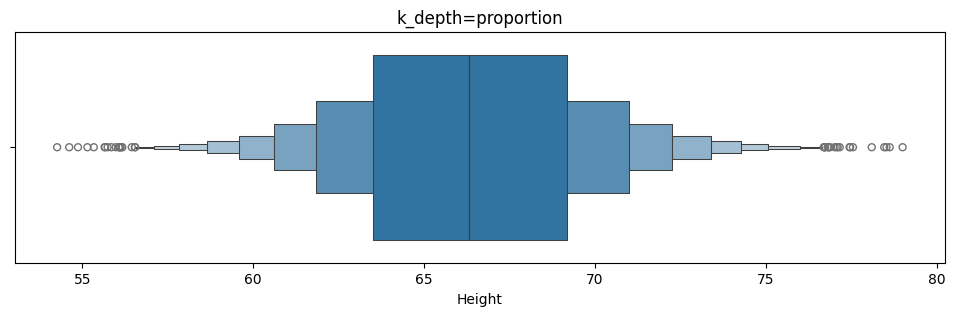

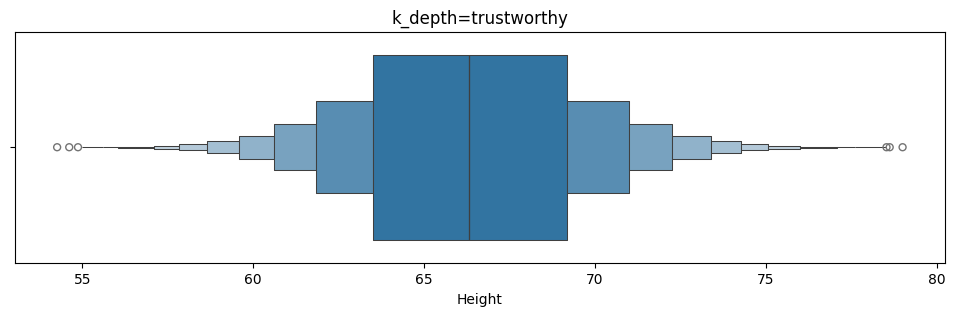

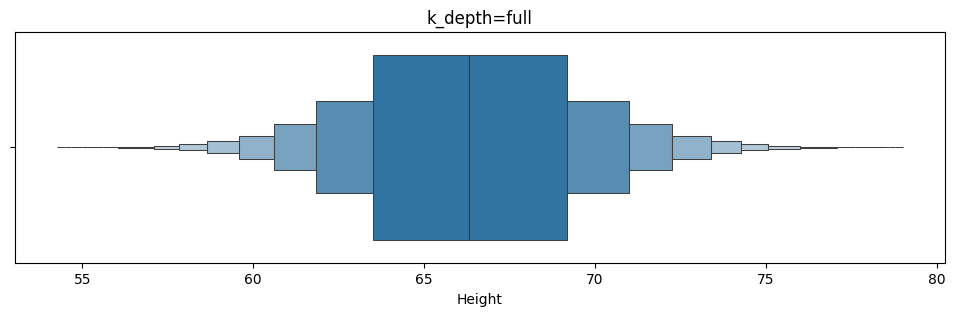

In [21]:
# exploring different methods 
for k in ["tukey", "proportion", "trustworthy", "full"]:
    plt.figure(figsize=(12, 3)) 
    sns.boxenplot(wh['Height'], k_depth=k, orient='h')
    plt.title(f'k_depth={k}')
    plt.show()


The different methods produce varying numbers of boxes in the visualization:

1. **tukey**: The default method, which uses letter values until the amount of data needed for a level exceeds the total remaining data (produces 4 boxes in our example)
2. **proportion**: Creates boxes with exponentially decreasing proportions of data
3. **trustworthy**: Uses the smallest set of letter values needed for "trustworthy" estimation
4. **full**: Shows letter values for the full range of the data

These different depth methods allow you to adjust the level of detail in the visualization based on your dataset's characteristics and the specific outlier detection goals.

## Violin Plot

Violin plots combine aspects of box plots with density plots, making them powerful tools for visualizing the distribution of data and identifying outliers. They display:

1. A central box plot showing the median, interquartile range, and whiskers
2. A kernel density estimation that shows the full distribution shape
3. The width of the "violin" at any given point represents the density of data at that value

This visualization is particularly useful for:
- Revealing multimodality (multiple peaks) in your data that might indicate different populations or anomaly clusters
- Identifying asymmetry in distributions
- Showing the full distribution while still highlighting outliers

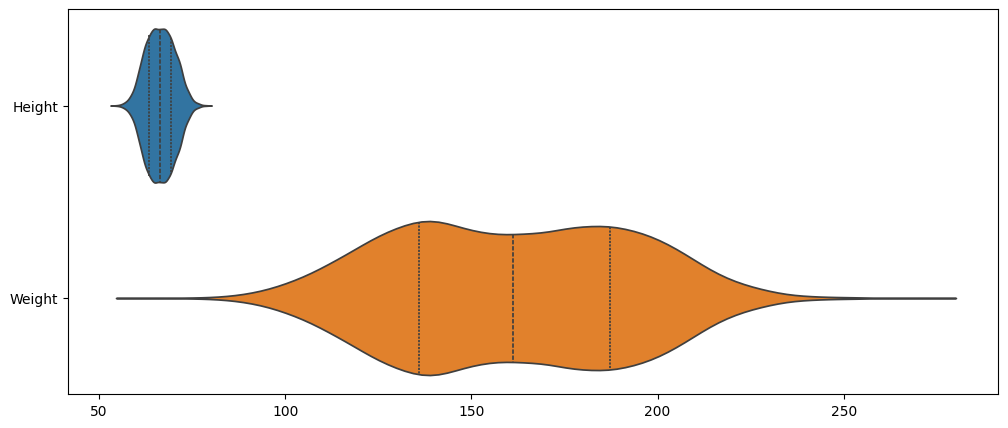

In [22]:
sns.violinplot(wh, inner='quartile', orient='h');

In this example:

- We create a horizontal violin plot of our taxi passenger count data
- The `inner='quartile'` parameter adds box plot quartile lines inside the violin
- The central white dot represents the median
- The thick black bar in the center represents the interquartile range (IQR)
- The thin black lines extending from the box represent the whiskers (typically 1.5 × IQR)
- Points beyond the whiskers are potential outliers
- The width of the violin shows the density distribution

Notice how the violin plot clearly shows the asymmetry in our data distribution and highlights the potential outliers at higher passenger count values.

## There is more

Beyond the basic visualization techniques covered above, there are several additional approaches that can be useful for outlier detection:

1. **Kernel Density Estimation (KDE)** plots - These smooth density estimations can help identify areas where data points are sparse, potentially indicating outliers
2. **Lag plots** - Particularly useful for time series data to detect outliers that disrupt temporal patterns
3. **Specialized statistical tests** - Such as Grubbs' test or the Generalized ESD test for formal outlier detection

Let's explore some of these additional methods:

# Recipe 3. Detecting Outliers using Tukey's Method

Tukey's method (also known as the IQR method or boxplot method) is a robust statistical approach for identifying outliers. Unlike methods that rely on mean and standard deviation (which are sensitive to outliers themselves), Tukey's method uses quartiles, which are more resistant to the influence of extreme values.

This recipe demonstrates how to:
1. Calculate quartiles and the interquartile range (IQR)
2. Define boundaries for potential outliers using the IQR
3. Identify and filter outliers based on these boundaries
4. Visualize the results to understand the impact of outlier removal

## Define the `iqr_outliers` function

Before applying Tukey's method, we'll first look at various ways to compute percentiles and quartiles in Python. This helps us understand the underlying statistical concepts before implementing the outlier detection algorithm.

First, we prepare our data by resampling to daily values and examine its statistical distribution using the `describe()` method with custom percentiles. This helps us understand the spread and central tendency of our data before looking for outliers.

In [10]:
wh.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [11]:
percentiles = [0, 0.05, .10, .25, .5, .75, .90, .95, 1]
wh.describe(percentiles= percentiles)

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
0%,54.263133,64.700127
5%,60.246221,111.098388
10%,61.412701,119.754096
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525


Here we're using NumPy's `percentile()` function as an alternative way to calculate the same percentiles. This function computes the q-th percentile of the data along the specified axis. The percentiles are given as integers (0-100) rather than decimals (0-1).

In [12]:
percentiles = [0, 5, 10, 25, 50, 75, 90, 95, 100]
np.percentile(wh['Height'], percentiles)

array([54.26313333, 60.24622083, 61.41270131, 63.50562048, 66.31807008,
       69.17426173, 71.47214936, 72.61710607, 78.99874235])

In [13]:
np.percentile(wh['Weight'], percentiles)

array([ 64.70012671, 111.09838835, 119.75409603, 135.81805131,
       161.2129277 , 187.16952487, 203.51964474, 211.76755583,
       269.98969851])

NumPy also provides the `quantile()` function, which is similar to `percentile()` but works with quantiles (decimals from 0-1) instead of percentiles (0-100). The results are identical to our previous calculation, just using a different scale. For Tukey's method, we'll be focusing on the quantiles at 0.25 (Q1) and 0.75 (Q3).

In [14]:
quantiles = [0, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 1]
np.quantile(wh['Height'], quantiles)

array([54.26313333, 60.24622083, 61.41270131, 63.50562048, 66.31807008,
       69.17426173, 71.47214936, 72.61710607, 78.99874235])

## Implementing Tukey's Method

Now we'll implement Tukey's method for outlier detection. This approach is based on the interquartile range (IQR), which is the range between the first quartile (Q1) and third quartile (Q3).

Tukey's method works by:
1. Calculating Q1 (25th percentile) and Q3 (75th percentile)
2. Computing the IQR as Q3 - Q1
3. Defining "fences" (boundaries) at Q1 - k×IQR and Q3 + k×IQR
4. Classifying any points beyond these fences as potential outliers

The parameter `k` determines how sensitive the detection is. Traditionally:
- k = 1.5 identifies "mild" outliers (commonly used)
- k = 3.0 identifies "extreme" outliers

This method is robust because it's based on quartiles, which are less influenced by extreme values than mean and standard deviation.

In [15]:
def iqr_outliers(data, k):
    """
    Detect outliers using Tukey's method with customizable fence multiplier.
    
    Parameters:
    data (DataFrame): Time series data with a 'value' column
    k (float): The fence multiplier to use (typically 1.5)
    
    Returns:
    DataFrame: Filtered data containing only outlier points
    """
    q1, q3 = np.percentile(data, [25, 75])
    IQR = q3 - q1
    lower_fence = q1 - (k * IQR)
    upper_fence = q3 + (k * IQR)
    return data[(data.values > upper_fence) | (data.values < lower_fence)]

Now let's apply our `iqr_outliers` function to our daily taxi passenger data with the standard k=1.5 value and see what potential outliers it identifies.

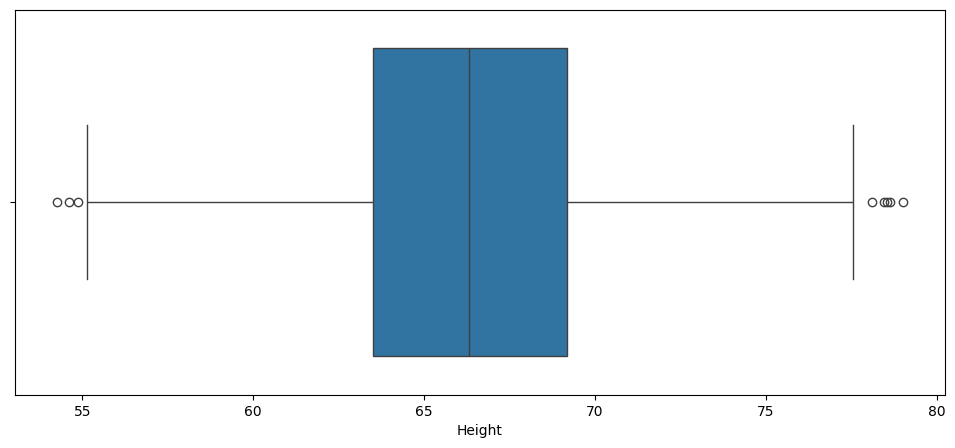

In [16]:
sns.boxplot(wh['Height'], orient='h', whis=1.5);

In [17]:
outliers = iqr_outliers(wh['Height'], 1.5)
print(outliers)

994     78.095867
1317    78.462053
2014    78.998742
3285    78.528210
3757    78.621374
6624    54.616858
7294    54.873728
9285    54.263133
Name: Height, dtype: float64


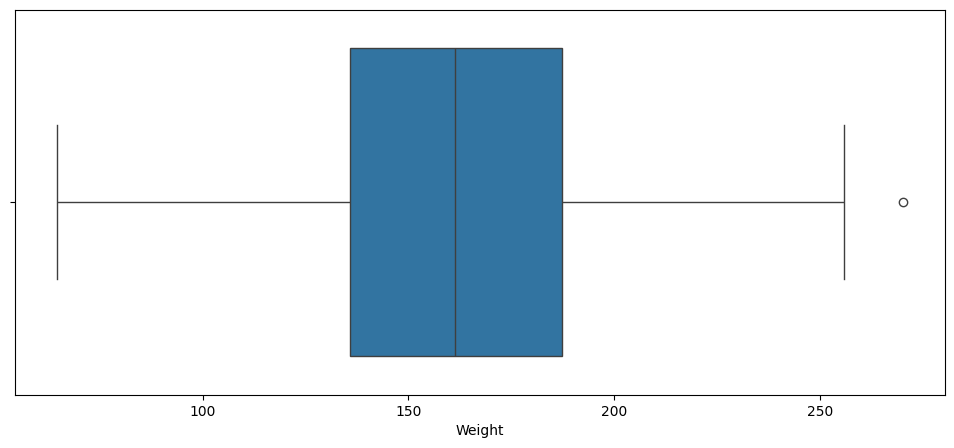

In [18]:
sns.boxplot(wh['Weight'], orient='h', whis=1.5);

In [19]:
outliers = iqr_outliers(wh['Weight'], 1.5)
print(outliers)

2014    269.989699
Name: Weight, dtype: float64


Next, let's visualize these outliers on our time series using the `plot_outliers` function. This will help us see where these potential anomalies occur in relation to the overall passenger count pattern. The `labels=True` parameter adds date labels to our outliers to make them easier to identify.

# Recipe 4. Detecting Outliers using Z-Scores

Another common method for detecting outliers is using Z-scores, which measures how many standard deviations a data point is from the mean. This approach is more suitable when your data follows a normal distribution.

$$
\Large z = \frac{x - \mu}{\sigma}
$$

In [20]:
def zscore(df, threshold=3):
    """
    Detect outliers using z-score method with customizable threshold.
    
    Parameters:
    df (DataFrame): Time series data with a 'value' column
    threshold (float): The threshold in standard deviations (typically 2-3)
    
    Returns:
    tuple: (outliers DataFrame, transformed DataFrame with z-scores)
    """
    data = df.copy()
    data['zscore'] = (data - data.mean())/data.std()
    outliers = data[(data['zscore'] <= -threshold) | (data['zscore'] >= threshold)]
    
    return outliers, data

In [21]:
threshold = 3
outliers, transformed = zscore(wh[['Height']], threshold)

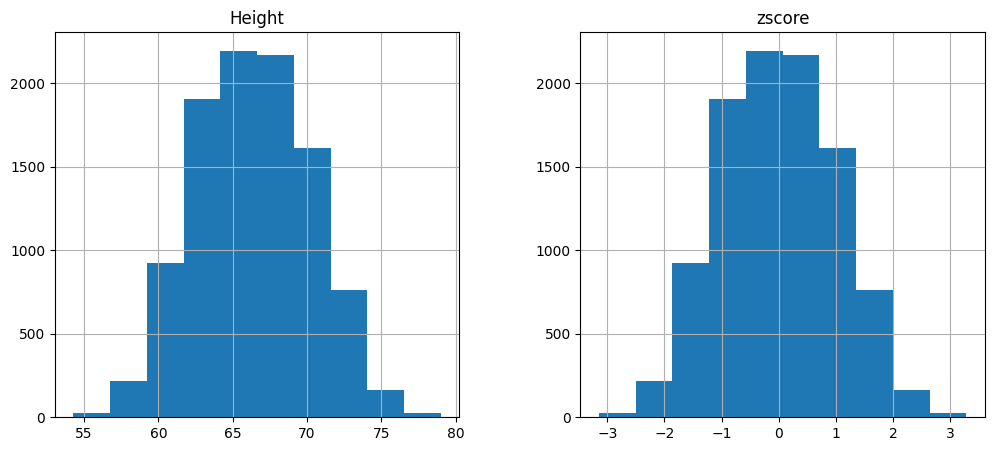

In [22]:
transformed.hist();

In [23]:
outliers

,Height,zscore
994,78.095867,3.048271
1317,78.462053,3.143445
2014,78.998742,3.282934
3285,78.528210,3.160640
3757,78.621374,3.184854
6624,54.616858,-3.054091
9285,54.263133,-3.146027


## Creating a Z-Score Visualization Function

To better understand how the z-score method identifies outliers, let's create a specialized visualization function. This function will:

1. Plot all data points based on their z-score values
2. Add horizontal threshold lines at the specified standard deviation boundaries
3. Highlight points that exceed the threshold (outliers) with a different color

This visualization makes it easier to interpret which data points are considered anomalous and how far they deviate from the normal range.

In [24]:
def plot_zscore(data_series, d=3):
    """
    Plot the standardized z-scores with threshold lines using Series index for x-axis.
    
    Parameters:
    - data_series: Series containing z-scores with datetime index
    - d: Threshold in standard deviations (default: 3)
    """
    
    plt.plot(data_series.index, data_series.values, 'k^', markersize=4)
    
    plt.axhline(y=d, color='r', linestyle='--', label=f'+{d} SD')
    plt.axhline(y=-d, color='r', linestyle='--', label=f'-{d} SD')
    
    # Highlight outliers
    outliers = data_series[abs(data_series) > d]
    if not outliers.empty:
        plt.plot(outliers.index, outliers.values, 'ro', markersize=8, label='Outliers')
    
    plt.ylabel('Z-score')
    plt.title('Standardized Taxi Passenger Data with Outlier Thresholds')
    plt.legend()
    
    # Format x-axis for dates
    plt.gcf().autofmt_xdate()
    plt.tight_layout()


Let's apply our `plot_zscore` function using the same threshold value of 2.5 that we used for our outlier detection. This visualization will display:

1. All data points as black triangles showing their z-score values
2. Horizontal red dashed lines at +/- 2.5 standard deviations marking our threshold boundaries
3. Red circles highlighting the points identified as outliers (those beyond our thresholds)

This visualization makes it easy to see exactly which points are considered anomalous according to our z-score criterion.

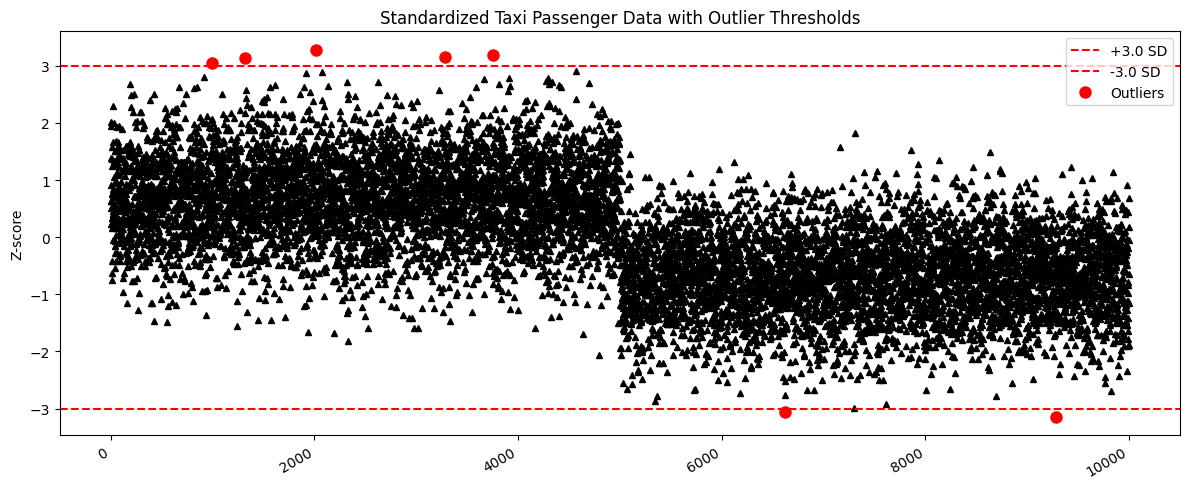

In [27]:
plot_zscore(transformed['zscore'], d=3.0)


In [72]:
outliers

,Height,zscore
994,78.095867,3.048271
1317,78.462053,3.143445
2014,78.998742,3.282934
3285,78.528210,3.160640
3757,78.621374,3.184854
6624,54.616858,-3.054091
9285,54.263133,-3.146027


## There's More

Since the z-score method assumes that the data follows a normal distribution, it's important to test this assumption before applying the method. If the data is not normally distributed, the z-score results may be misleading.

Let's create a function that uses the Kolmogorov-Smirnov test to check if our data follows a normal distribution:

In [73]:
from statsmodels.stats.diagnostic import kstest_normal

def test_normal(df):
    """
    Test if data follows a normal distribution using Kolmogorov-Smirnov test.
    
    Parameters:
    df (Series or array-like): Data to test for normality
    
    Returns:
    None: Prints whether to reject or fail to reject the null hypothesis
    """
    t_test, p_value = kstest_normal(df)
    if p_value < 0.05:
        print("Reject null hypothesis. Data is not normal")
    else:
        print("Fail to reject null hypothesis. Data is normal")

Now let's run the normality test on our taxi data to see if the z-score method is appropriate for this dataset:

In [75]:
test_normal(wh['Height'])

Reject null hypothesis. Data is not normal


## Conclusion on Z-Score Method

Our normality test indicates that our taxi data is **not normally distributed**. This is important because:

1. The z-score method assumes data follows a normal distribution
2. When applied to non-normal data, the standard z-score thresholds may not be appropriate
3. This could lead to either missing true outliers or flagging too many false positives

This limitation brings us to our next recipe: the Modified Z-Score method, which is more robust to non-normal distributions and less influenced by extreme values.

# Recipe 5. Modified Z-Score
* Understand the difference between Z-Score and Modified Z-Score
* When to use Modified Z-Score (and the assumptions behind Z-score)
* Scipy's Percent Point Function (PPF)

In [76]:
import scipy.stats as stats
stats.norm.ppf(0.75)

np.float64(0.6744897501960817)

## Understanding the Percent Point Function

Before implementing the modified Z-score, let's understand the `ppf()` function from SciPy's stats module. The Percent Point Function (PPF) is the inverse of the Cumulative Distribution Function (CDF). 

For a standard normal distribution, `stats.norm.ppf(0.75)` returns the value below which 75% of the observations fall - which is approximately 0.6745. This constant will be used in our modified Z-score calculation to make it consistent with the standard normal distribution.

## Implementing Modified Z-Score Method

Next, we'll implement the modified Z-score method, which addresses the limitations of the standard Z-score approach by:

1. Using the **median** instead of the mean as a measure of central tendency
2. Using the **Median Absolute Deviation (MAD)** instead of standard deviation as a measure of dispersion

This makes the method more robust to outliers and non-normal distributions because median and MAD are less influenced by extreme values compared to mean and standard deviation.

The formula for the modified Z-score is:

$$M_i = \frac{0.6745 \times (x_i - \tilde{x})}{MAD}$$

Where:
- $M_i$ is the modified Z-score
- $x_i$ is the data point
- $\tilde{x}$ is the median of the data
- $MAD$ is the median absolute deviation
- $0.6745$ is the constant that makes the modified Z-score comparable to the standard Z-score for normal distributions

In [28]:
import scipy.stats as stats
def modified_zscore(df, threshold=3):
    """
    Detect outliers using a modified z-score method with customizable threshold.
    
    Parameters:
    df (DataFrame): Time series data with a 'value' column
    threshold (float): The threshold in standard deviations (typically 2-3)
    
    Returns:
    tuple: (outliers DataFrame, transformed DataFrame with m_zscores)
    """
    data = df.copy()
    
    # Calculate median and MAD
    median = data.median()
    MAD = np.median(np.abs(data - median))

    # Calculate modified z-score
    s = stats.norm.ppf(0.75)
    data['m_zscore'] = s * (data - median) / MAD
    # Identify outliers
    outliers = data[(data['m_zscore'] > threshold) | (data['m_zscore'] < -threshold)]
    
    return outliers, data

## Applying the Modified Z-Score Method

Now let's apply our `modified_zscore()` function to the daily taxi passenger count data with a threshold of 3. This will:

1. Resample our data to daily averages
2. Calculate modified Z-scores for each data point
3. Identify outliers that exceed our specified threshold

The threshold value of 3 means we'll consider any point with a modified Z-score greater than 3 or less than -3 as an outlier.

In [29]:
threshold =  2.5
outliers, transformed = modified_zscore(wh[['Height']], threshold)

### Checking Detection Results

Let's first check how many outliers were identified by our modified Z-score approach:

In [30]:
outliers.shape
outliers

,Height,m_zscore
912,77.160801,2.576154
994,78.095867,2.798319
1317,78.462053,2.885322
1922,77.446620,2.644063
2014,78.998742,3.012836
2070,77.465569,2.648565
2623,76.842679,2.500571
3285,78.528210,2.901041
3669,77.008336,2.539930
3757,78.621374,2.923176


### Visualizing Distributions

To better understand how the modified Z-score transformation affects our data, let's create histograms of both the original values and the modified Z-scores:

These histograms help us compare the distribution of the original data (which is likely non-normal) with the distribution of the modified Z-scores. Note that unlike standard Z-scores, which would transform a normal distribution into another normal distribution, the modified Z-score preserves the shape of the original distribution - it simply rescales it using robust statistics.

array([[<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'm_zscore'}>]], dtype=object)

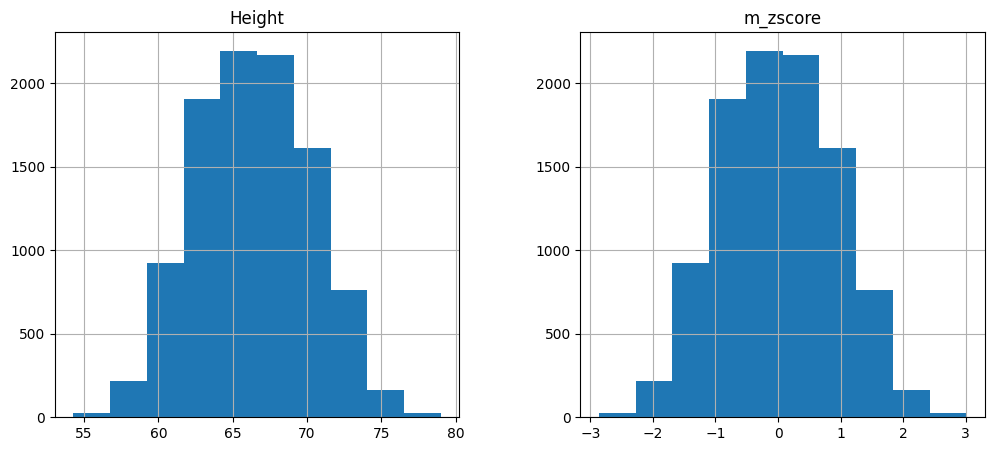

In [31]:
transformed.hist()

### Examining Identified Outliers

Now let's look at the specific data points identified as outliers by the modified Z-score method. This will show us the dates and passenger counts that exceeded our threshold:

In [32]:
outliers

,Height,m_zscore
912,77.160801,2.576154
994,78.095867,2.798319
1317,78.462053,2.885322
1922,77.446620,2.644063
2014,78.998742,3.012836
2070,77.465569,2.648565
2623,76.842679,2.500571
3285,78.528210,2.901041
3669,77.008336,2.539930
3757,78.621374,2.923176


### Visualizing Outliers in the Time Series

Let's visualize these outliers in the context of our original time series data. This helps us understand the pattern and magnitude of the anomalies:

The plot clearly shows where the outliers are located in our time series. We can observe that the modified Z-score method successfully identified major events like holidays and severe weather that caused significant deviations in taxi passenger counts.

### Visualizing Modified Z-Scores with Threshold Lines

We can also visualize the modified Z-scores directly, with horizontal lines indicating our threshold boundaries:

This plot shows:
1. All data points as black triangles, representing their modified Z-score values
2. Red dashed lines at +/- 3 standard deviations marking our threshold boundaries
3. Red circles highlighting the points identified as outliers (those beyond our thresholds)

Notice that one point is very close to the threshold line. This demonstrates the importance of carefully selecting threshold values and potentially investigating borderline cases.

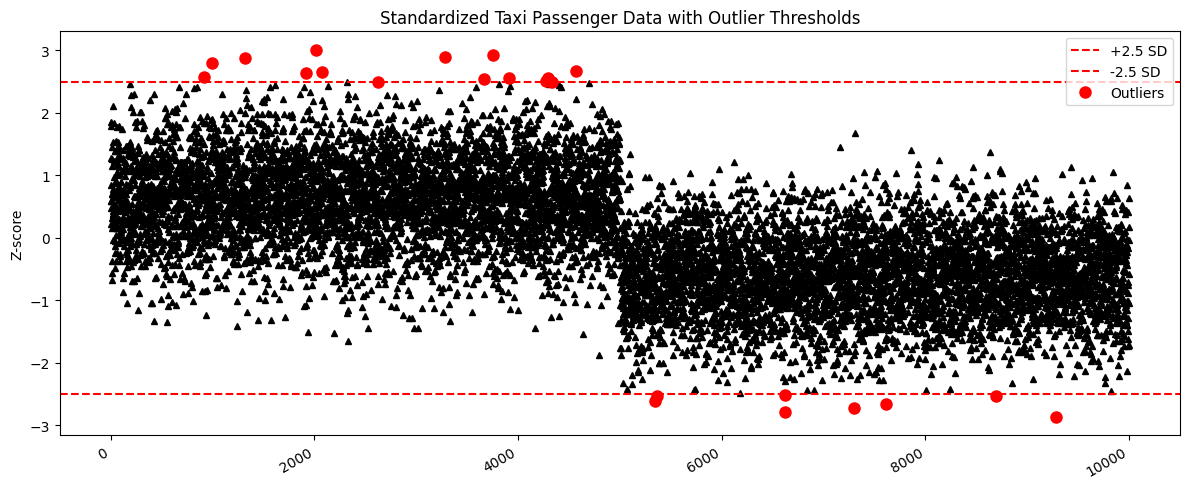

In [36]:
plot_zscore(transformed['m_zscore'], d=2.5)

## How it Works

The modified Z-score method improves upon the standard Z-score by using robust statistics—the median and Median Absolute Deviation (MAD)—which are less influenced by extreme values.

### Key advantages over standard Z-scores:

1. **Robustness to outliers:** Since the median and MAD are less affected by extreme values than the mean and standard deviation, the modified Z-score provides a more reliable measure when outliers are present.

2. **Works with non-normal distributions:** Unlike the standard Z-score, the modified Z-score does not assume that the underlying data follows a normal distribution, making it suitable for skewed or heavy-tailed data.

3. **Better detection performance:** In our example, the modified Z-score detected 6 outliers (compared to only 4 with the standard Z-score) and successfully identified more of the known anomalous dates.

4. **Consistency factor:** The constant 0.6745 (derived from the 75th percentile of the standard normal distribution) makes the modified Z-score comparable to the standard Z-score for normal distributions.

The modified Z-score is calculated as:

$$M_i = \frac{0.6745 \times (x_i - \tilde{x})}{MAD}$$

Where the MAD (Median Absolute Deviation) is:

$$MAD = median(|x_i - \tilde{x}|)$$

This approach minimizes the influence of outliers on both the measure of central tendency and the measure of dispersion, resulting in more reliable outlier detection, especially for real-world data.